# Project Car
The goal of this project is to practice a couple of common machine learning techniques. I will be using a dataset of used car prices to train a Decision Tree, a Random Forest, and a Linear Regressin Model. The dataset was prepared and shared by a user in Kaggle and it is almost ready for analysis (will do a couple of changes and some features enineering).

I will divide this project into two parts. The first part will train and test the machine learning models mentioned above with the sole objective of getting good prediction values (Prediction). The second part of will focus on the interpretation of the features and will deep dive into the linear regression and its coefficients (Inference).

In [1]:
# Load libraries
import pandas as pd
import numpy as np

## Part 1 - Prediction

### 1. Data Preparation
Our goal is to create a dataset that is ready for analysis. We will need to perform a series of data processing. 

The data downloaded from Kaggle is divided into train and test, but this is a little bit misleading. The test data has no Used Car Price (the target column) so it is not possible to use it for model testing. This is actually a dataset of used cars with unknown second hand prices - we will use in the end of this project to apply our trained model and generate predictions (we will not be able to validate those, though)

In [2]:
# Load datasets
rawdf = pd.read_csv("train.csv")
unk = pd.read_csv("test.csv")

In [3]:
rawdf = pd.concat([rawdf,unk])
rawdf["Dataset"] = rawdf["Price"].apply(lambda x : "Unknown" if np.isnan(x) else "Historical" )
df = rawdf.copy()

#### 1.1 Investigate NaN values

As shown below, there are lots of NaNs in New_Price. If we are to use New_Price in our model, we will need to either think of a good way to fill in those NaNs or just remove all NaN vales and train the model with much less data. We could fill those NaNs by fitting a separate model and prediciting New Prices for all the data, but that alone would probably be a decent amount of work for a standalone project. For now, I will just remove NaNs altogether.

In [4]:
# Lots of NaNs in "New_Price" column
# Let's investigate and see if I can fill in some of the new prices

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 1233
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Dataset            7253 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 850.0+ KB


In [5]:
# Let's check New_Price column
# How many valid values?

df[~df["New_Price"].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Dataset
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Historical
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,Historical
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95,Historical
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00,Historical
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55,Historical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,Tata Tiago 1.05 Revotorq XT Option,Pune,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5.0,7.06 Lakh,NaN,Unknown
1212,Ford EcoSport 1.5 Petrol Ambiente,Kochi,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,8.79 Lakh,NaN,Unknown
1213,Jeep Compass 1.4 Sport,Mumbai,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,160 bhp,5.0,18.16 Lakh,NaN,Unknown
1216,Maruti Vitara Brezza ZDi,Kochi,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,10.57 Lakh,NaN,Unknown


In [6]:
df = df.dropna(subset=["New_Price"])
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Dataset
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Historical
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,Historical
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95,Historical
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00,Historical
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55,Historical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,Tata Tiago 1.05 Revotorq XT Option,Pune,2016,41413,Diesel,Manual,First,27.28 kmpl,1047 CC,69 bhp,5.0,7.06 Lakh,NaN,Unknown
1212,Ford EcoSport 1.5 Petrol Ambiente,Kochi,2017,39015,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,8.79 Lakh,NaN,Unknown
1213,Jeep Compass 1.4 Sport,Mumbai,2018,6000,Petrol,Manual,First,16.0 kmpl,1368 CC,160 bhp,5.0,18.16 Lakh,NaN,Unknown
1216,Maruti Vitara Brezza ZDi,Kochi,2017,21380,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,10.57 Lakh,NaN,Unknown


#### 1.2 Check Units and Datatypes of New Price
It seems like some of the features have values quoted in different units. New_Price, for example, has values in "Cr" and "Lakh". <br/>
We will need to convert those to the same unit of Price (Lakh) and also remove the string so that the machine learning models can perform numerical calculations. 

In [7]:
# Some observations are not quoted in Lakhs... 
df.sort_values(["New_Price"], ascending=True).head(20)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Dataset
489,Mercedes-Benz GLS 350d 4MATIC,Pune,2017,129000,Diesel,Automatic,First,11.0 kmpl,2987 CC,258 bhp,7.0,1 Cr,56.00,Historical
1885,Mercedes-Benz GLS 350d Grand Edition,Delhi,2018,6000,Diesel,Automatic,First,11.0 kmpl,2987 CC,258 bhp,7.0,1.02 Cr,79.00,Historical
327,Audi Q7 45 TDI Quattro Technology,Coimbatore,2017,97430,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.0,1.04 Cr,62.67,Historical
1336,Audi Q7 45 TDI Quattro Technology,Mumbai,2016,20002,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.0,1.04 Cr,67.00,Historical
2095,Mercedes-Benz SLC 43 AMG,Coimbatore,2019,2526,Petrol,Automatic,First,19.0 kmpl,2996 CC,362.07 bhp,2.0,1.06 Cr,83.96,Historical
941,Mercedes-Benz SLC 43 AMG,Coimbatore,2018,18338,Petrol,Automatic,First,19.0 kmpl,2996 CC,362.07 bhp,2.0,1.06 Cr,NaN,Unknown
2528,Land Rover Discovery SE 3.0 TD6,Delhi,2016,59000,Diesel,Automatic,First,18.0 kmpl,2993 CC,255 bhp,7.0,1.13 Cr,36.75,Historical
2178,Land Rover Discovery HSE Luxury 3.0 TD6,Mumbai,2017,35000,Diesel,Automatic,First,18.0 kmpl,2993 CC,255 bhp,7.0,1.27 Cr,41.60,Historical
148,Audi RS5 Coupe,Mumbai,2013,23000,Petrol,Automatic,First,11.05 kmpl,2894 CC,444 bhp,4.0,1.28 Cr,37.00,Historical
4061,Audi RS5 Coupe,Mumbai,2013,23312,Petrol,Automatic,First,11.05 kmpl,2894 CC,444 bhp,4.0,1.28 Cr,40.50,Historical


In [8]:
# New_Price is quoted in either "Lakh" or "Cr"
# Code below shows that these are the only units described in the column

df["New_Price"].str.extract("\d*\.*\d*\s*(.*)", expand=False).unique()

array(['Lakh', 'Cr'], dtype=object)

In [9]:
# let's remove Lakh and Cr from New_Price.
# Convert all New_Price values to "Lakh" (same unit of Price, according to the data dictionary provided by the Kaggle user)

df["New_Price_fmt"] = df["New_Price"].str.replace(" Lakh| Cr", "", regex=True).astype("float")
df["temp_Unit"] = df["New_Price"].fillna("NA").apply(lambda x : 100 if " Cr" in x else 1)
df["New_Price_fmt"] = df["temp_Unit"]*df["New_Price_fmt"]
df["New_Price"] = df["New_Price_fmt"]
df.drop(["temp_Unit", "New_Price_fmt"], axis=1, inplace=True)

# Check the data
df.sort_values(["New_Price"], ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Dataset
4221,Maruti Alto K10 LXI,Kochi,2014,51349,Petrol,Manual,First,24.07 kmpl,998 CC,67.1 bhp,5.0,3.91,2.93,Historical
4571,Maruti Alto K10 LXI,Delhi,2016,35027,Petrol,Manual,First,24.07 kmpl,998 CC,67.1 bhp,5.0,3.91,3.00,Historical
295,Maruti Alto K10 LXI,Kochi,2017,42954,Petrol,Manual,First,24.07 kmpl,998 CC,67.1 bhp,5.0,3.91,NaN,Unknown
3080,Renault KWID RXL,Kochi,2017,24214,Petrol,Manual,Second,25.17 kmpl,799 CC,53.3 bhp,5.0,3.95,3.46,Historical
785,Renault KWID RXL,Kochi,2018,16292,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,3.95,NaN,Unknown
5509,Renault KWID RXL,Jaipur,2016,26000,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,3.96,2.55,Historical
503,Renault KWID RXL,Jaipur,2017,30000,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,3.96,NaN,Unknown
4819,Datsun redi-GO T,Kolkata,2016,15000,Petrol,Manual,First,22.7 kmpl,799 CC,53.64 bhp,5.0,3.98,2.25,Historical
182,Maruti Alto LXI,Kolkata,2019,1000,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,3.99,NaN,Unknown
920,Datsun redi-GO T Option,Jaipur,2018,46000,Petrol,Manual,First,22.7 kmpl,799 CC,53.64 bhp,5.0,3.99,NaN,Unknown


#### 1.3 Check Units and Datatypes of Other Columns
Turns out other columns have similar problems and need careful treatment.<br/>
We will check Power, Engine, and Mileage.

In [10]:
# Note that mileage seems to have only 814 valid values. There is one NaN.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 2 to 1217
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1006 non-null   object 
 1   Location           1006 non-null   object 
 2   Year               1006 non-null   int64  
 3   Kilometers_Driven  1006 non-null   int64  
 4   Fuel_Type          1006 non-null   object 
 5   Transmission       1006 non-null   object 
 6   Owner_Type         1006 non-null   object 
 7   Mileage            1005 non-null   object 
 8   Engine             1006 non-null   object 
 9   Power              1006 non-null   object 
 10  Seats              1006 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              824 non-null    float64
 13  Dataset            1006 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.9+ KB


In [11]:
# Edit "Power"

# I need to remove "bhp" and leave only the numerical value
df["Power"].str.extract("\d*\.*\d*\s*(.*)", expand=False).unique()

array(['bhp'], dtype=object)

In [12]:
# Remove "bhp" and convert to float
df["Power"] = df["Power"].str.replace(" bhp", "", regex=True).astype("float")

# Check the data
df.sort_values(["New_Price"], ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Dataset
4221,Maruti Alto K10 LXI,Kochi,2014,51349,Petrol,Manual,First,24.07 kmpl,998 CC,67.10,5.0,3.91,2.93,Historical
4571,Maruti Alto K10 LXI,Delhi,2016,35027,Petrol,Manual,First,24.07 kmpl,998 CC,67.10,5.0,3.91,3.00,Historical
295,Maruti Alto K10 LXI,Kochi,2017,42954,Petrol,Manual,First,24.07 kmpl,998 CC,67.10,5.0,3.91,NaN,Unknown
3080,Renault KWID RXL,Kochi,2017,24214,Petrol,Manual,Second,25.17 kmpl,799 CC,53.30,5.0,3.95,3.46,Historical
785,Renault KWID RXL,Kochi,2018,16292,Petrol,Manual,First,25.17 kmpl,799 CC,53.30,5.0,3.95,NaN,Unknown
5509,Renault KWID RXL,Jaipur,2016,26000,Petrol,Manual,First,25.17 kmpl,799 CC,53.30,5.0,3.96,2.55,Historical
503,Renault KWID RXL,Jaipur,2017,30000,Petrol,Manual,First,25.17 kmpl,799 CC,53.30,5.0,3.96,NaN,Unknown
4819,Datsun redi-GO T,Kolkata,2016,15000,Petrol,Manual,First,22.7 kmpl,799 CC,53.64,5.0,3.98,2.25,Historical
182,Maruti Alto LXI,Kolkata,2019,1000,Petrol,Manual,First,24.7 kmpl,796 CC,47.30,5.0,3.99,NaN,Unknown
920,Datsun redi-GO T Option,Jaipur,2018,46000,Petrol,Manual,First,22.7 kmpl,799 CC,53.64,5.0,3.99,NaN,Unknown


In [13]:
# Edit Engine
df["Engine"].str.extract("\d*\.*\d*\s*(.*)", expand=False).unique()

array(['CC'], dtype=object)

In [14]:
# Remove CC and convert to float
df["Engine"] = df["Engine"].str.replace(" CC", "", regex=True).astype("float")

# Check the data
df.sort_values(["New_Price"], ascending=True)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Dataset
4221,Maruti Alto K10 LXI,Kochi,2014,51349,Petrol,Manual,First,24.07 kmpl,998.0,67.10,5.0,3.91,2.93,Historical
4571,Maruti Alto K10 LXI,Delhi,2016,35027,Petrol,Manual,First,24.07 kmpl,998.0,67.10,5.0,3.91,3.00,Historical
295,Maruti Alto K10 LXI,Kochi,2017,42954,Petrol,Manual,First,24.07 kmpl,998.0,67.10,5.0,3.91,NaN,Unknown
3080,Renault KWID RXL,Kochi,2017,24214,Petrol,Manual,Second,25.17 kmpl,799.0,53.30,5.0,3.95,3.46,Historical
785,Renault KWID RXL,Kochi,2018,16292,Petrol,Manual,First,25.17 kmpl,799.0,53.30,5.0,3.95,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,Land Rover Range Rover Sport HSE,Kochi,2015,38467,Diesel,Automatic,First,12.65 kmpl,2993.0,255.00,5.0,160.00,70.66,Historical
3199,BMW 7 Series 730Ld Design Pure Excellence CBU,Kolkata,2012,41100,Diesel,Automatic,First,16.77 kmpl,2993.0,261.49,5.0,166.00,26.50,Historical
4778,Mercedes-Benz S-Class S 350 d,Bangalore,2011,47140,Diesel,Automatic,Second,13.5 kmpl,2925.0,281.61,5.0,171.00,30.00,Historical
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33 kmpl,2993.0,255.00,5.0,230.00,160.00,Historical


In [15]:
# Edit Mileage 
df["Mileage"].str.extract("\d*\.*\d*\s*(.*)", expand=False).unique()

array(['kmpl', 'km/kg', nan], dtype=object)

In [16]:
# 18 rows have values in km/kg 
df["Mileage_Unit"] = df["Mileage"].str.extract("\d*\.*\d*\s*(.*)", expand=False)
df[df["Mileage_Unit"]=="km/kg"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Dataset,Mileage_Unit
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54 km/kg,998.0,67.04,5.0,5.54,2.96,Historical,km/kg
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54 km/kg,998.0,67.04,5.0,5.58,3.05,Historical,km/kg
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54 km/kg,998.0,67.04,5.0,5.54,3.90,Historical,km/kg
2701,Maruti Celerio CNG VXI MT,Kochi,2016,70536,CNG,Manual,First,31.79 km/kg,998.0,58.33,5.0,5.87,4.58,Historical,km/kg
3119,Maruti Alto K10 LXI CNG Optional,Kochi,2018,44202,CNG,Manual,First,32.26 km/kg,998.0,58.20,4.0,4.66,4.00,Historical,km/kg
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54 km/kg,998.0,67.04,5.0,5.35,3.25,Historical,km/kg
3180,Maruti Eeco CNG 5 Seater AC,Ahmedabad,2015,47001,CNG,Manual,First,20.0 km/kg,1196.0,63.00,5.0,5.36,3.72,Historical,km/kg
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54 km/kg,998.0,67.04,5.0,5.58,2.85,Historical,km/kg
5178,Maruti Celerio CNG VXI MT,Delhi,2015,64687,CNG,Manual,First,31.79 km/kg,998.0,58.33,5.0,5.87,3.80,Historical,km/kg
769,Maruti Alto K10 LXI CNG Optional,Delhi,2017,33000,CNG,Manual,First,32.26 km/kg,998.0,58.20,4.0,4.66,NaN,Unknown,km/kg


In [17]:
# Remove rows with km/kg (very small portion of the dataset)
df = df.drop(df[df["Mileage_Unit"]=="km/kg"].index)

# Check data
df.sort_values(["New_Price"], ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Dataset,Mileage_Unit
4221,Maruti Alto K10 LXI,Kochi,2014,51349,Petrol,Manual,First,24.07 kmpl,998.0,67.10,5.0,3.91,2.93,Historical,kmpl
4571,Maruti Alto K10 LXI,Delhi,2016,35027,Petrol,Manual,First,24.07 kmpl,998.0,67.10,5.0,3.91,3.00,Historical,kmpl
295,Maruti Alto K10 LXI,Kochi,2017,42954,Petrol,Manual,First,24.07 kmpl,998.0,67.10,5.0,3.91,NaN,Unknown,kmpl
3080,Renault KWID RXL,Kochi,2017,24214,Petrol,Manual,Second,25.17 kmpl,799.0,53.30,5.0,3.95,3.46,Historical,kmpl
785,Renault KWID RXL,Kochi,2018,16292,Petrol,Manual,First,25.17 kmpl,799.0,53.30,5.0,3.95,NaN,Unknown,kmpl
503,Renault KWID RXL,Jaipur,2017,30000,Petrol,Manual,First,25.17 kmpl,799.0,53.30,5.0,3.96,NaN,Unknown,kmpl
5509,Renault KWID RXL,Jaipur,2016,26000,Petrol,Manual,First,25.17 kmpl,799.0,53.30,5.0,3.96,2.55,Historical,kmpl
4819,Datsun redi-GO T,Kolkata,2016,15000,Petrol,Manual,First,22.7 kmpl,799.0,53.64,5.0,3.98,2.25,Historical,kmpl
182,Maruti Alto LXI,Kolkata,2019,1000,Petrol,Manual,First,24.7 kmpl,796.0,47.30,5.0,3.99,NaN,Unknown,kmpl
920,Datsun redi-GO T Option,Jaipur,2018,46000,Petrol,Manual,First,22.7 kmpl,799.0,53.64,5.0,3.99,NaN,Unknown,kmpl


In [18]:
# Remove "kmpl" string and convert data to float
df["Mileage"] = df["Mileage"].str.replace(" kmpl", "", regex=True).astype("float")

# Remove Milege Unit (temporary column)
df = df.drop("Mileage_Unit", axis=1)

# Remove that single NaN value
df = df.dropna(subset = "Mileage")

# Check data
df.sort_values(["New_Price"], ascending=True)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Dataset
4221,Maruti Alto K10 LXI,Kochi,2014,51349,Petrol,Manual,First,24.07,998.0,67.10,5.0,3.91,2.93,Historical
4571,Maruti Alto K10 LXI,Delhi,2016,35027,Petrol,Manual,First,24.07,998.0,67.10,5.0,3.91,3.00,Historical
295,Maruti Alto K10 LXI,Kochi,2017,42954,Petrol,Manual,First,24.07,998.0,67.10,5.0,3.91,NaN,Unknown
3080,Renault KWID RXL,Kochi,2017,24214,Petrol,Manual,Second,25.17,799.0,53.30,5.0,3.95,3.46,Historical
785,Renault KWID RXL,Kochi,2018,16292,Petrol,Manual,First,25.17,799.0,53.30,5.0,3.95,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,Land Rover Range Rover Sport HSE,Kochi,2015,38467,Diesel,Automatic,First,12.65,2993.0,255.00,5.0,160.00,70.66,Historical
3199,BMW 7 Series 730Ld Design Pure Excellence CBU,Kolkata,2012,41100,Diesel,Automatic,First,16.77,2993.0,261.49,5.0,166.00,26.50,Historical
4778,Mercedes-Benz S-Class S 350 d,Bangalore,2011,47140,Diesel,Automatic,Second,13.50,2925.0,281.61,5.0,171.00,30.00,Historical
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.00,5.0,230.00,160.00,Historical


In [19]:
# Kilometer_Driven is int64; seems to be fine. I will leave it the way it is.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 2 to 1217
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               995 non-null    object 
 1   Location           995 non-null    object 
 2   Year               995 non-null    int64  
 3   Kilometers_Driven  995 non-null    int64  
 4   Fuel_Type          995 non-null    object 
 5   Transmission       995 non-null    object 
 6   Owner_Type         995 non-null    object 
 7   Mileage            995 non-null    float64
 8   Engine             995 non-null    float64
 9   Power              995 non-null    float64
 10  Seats              995 non-null    float64
 11  New_Price          995 non-null    float64
 12  Price              814 non-null    float64
 13  Dataset            995 non-null    object 
dtypes: float64(6), int64(2), object(6)
memory usage: 116.6+ KB


In [20]:
# Summary of the data
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Dataset
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Historical
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21.00,17.50,Historical
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462.0,103.25,5.0,10.65,9.95,Historical
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477.0,175.56,7.0,32.01,15.00,Historical
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995.0,190.00,5.0,47.87,18.55,Historical
28,Honda WRV i-VTEC VX,Kochi,2018,37430,Petrol,Manual,First,17.50,1199.0,88.70,5.0,10.57,9.90,Historical
34,Volkswagen Vento 1.6 Highline,Coimbatore,2014,55431,Petrol,Manual,Second,16.09,1598.0,103.50,5.0,12.33,6.98,Historical
36,Maruti Vitara Brezza ZDi Plus,Kochi,2018,50075,Diesel,Manual,First,24.30,1248.0,88.50,5.0,11.12,8.63,Historical
44,Hyundai Elantra 2.0 SX Option AT,Bangalore,2014,46374,Petrol,Automatic,First,14.62,1999.0,149.92,5.0,23.64,8.85,Historical
47,Toyota Innova Crysta 2.7 GX MT,Bangalore,2012,70704,Petrol,Manual,First,11.25,2694.0,163.70,7.0,18.64,10.95,Historical


#### 1.4 Encoding Categorical Variables
Sklearn requires that categorical variables be encoded. This means that I cannot feed strings into the model, I need to converts those a numeric datatype.<br/>
However, I also need to be careful not to assign numbers to a data that does not have any particular order to it. For example, I can set "Owner_Type = First" to 1 and "Owner Type = Second" to two, but I cannot do the same for "Location", "Transmission", and "Fuel Type". Their labels do not represent any particular order or magnitude. For these cases, I will need to perform a One Hot Encoding procedure.

In [21]:
# Owner type will be mapped
df["Owner_Type"].unique()
df["Owner_Type"] = df["Owner_Type"].map({"First":1, "Second": 2, "Third": 3})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 2 to 1217
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               995 non-null    object 
 1   Location           995 non-null    object 
 2   Year               995 non-null    int64  
 3   Kilometers_Driven  995 non-null    int64  
 4   Fuel_Type          995 non-null    object 
 5   Transmission       995 non-null    object 
 6   Owner_Type         995 non-null    int64  
 7   Mileage            995 non-null    float64
 8   Engine             995 non-null    float64
 9   Power              995 non-null    float64
 10  Seats              995 non-null    float64
 11  New_Price          995 non-null    float64
 12  Price              814 non-null    float64
 13  Dataset            995 non-null    object 
dtypes: float64(6), int64(3), object(5)
memory usage: 116.6+ KB


In [22]:
# These need to be one hot encoded
print(df["Fuel_Type"].unique())
print(df["Transmission"].unique())
print(df["Location"].unique())

['Petrol' 'Diesel']
['Manual' 'Automatic']
['Chennai' 'Mumbai' 'Kochi' 'Delhi' 'Coimbatore' 'Bangalore' 'Pune'
 'Ahmedabad' 'Kolkata' 'Hyderabad' 'Jaipur']


In [23]:
# encode categorical variables using pandas
dummy_transmission = pd.get_dummies(df["Transmission"], prefix="Trans")
dummy_fuel = pd.get_dummies(df["Fuel_Type"], prefix="Fuel")
dummy_location = pd.get_dummies(df["Location"], prefix="Loc")

# concatenate
df = pd.concat([df, dummy_transmission, dummy_fuel, dummy_location], axis=1)

In [24]:
# drop old columns
df = df.drop(["Transmission","Fuel_Type","Location"],axis=1)

In [25]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 2 to 1217
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               995 non-null    object 
 1   Year               995 non-null    int64  
 2   Kilometers_Driven  995 non-null    int64  
 3   Owner_Type         995 non-null    int64  
 4   Mileage            995 non-null    float64
 5   Engine             995 non-null    float64
 6   Power              995 non-null    float64
 7   Seats              995 non-null    float64
 8   New_Price          995 non-null    float64
 9   Price              814 non-null    float64
 10  Dataset            995 non-null    object 
 11  Trans_Automatic    995 non-null    uint8  
 12  Trans_Manual       995 non-null    uint8  
 13  Fuel_Diesel        995 non-null    uint8  
 14  Fuel_Petrol        995 non-null    uint8  
 15  Loc_Ahmedabad      995 non-null    uint8  
 16  Loc_Bangalore      995 no

In [26]:
# Rename one of the columns
df.rename(columns={"Kilometers_Driven":"DrivenKM", "Price":"SecHand_Price"}, inplace=True)
df.columns

Index(['Name', 'Year', 'DrivenKM', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'SecHand_Price', 'Dataset', 'Trans_Automatic',
       'Trans_Manual', 'Fuel_Diesel', 'Fuel_Petrol', 'Loc_Ahmedabad',
       'Loc_Bangalore', 'Loc_Chennai', 'Loc_Coimbatore', 'Loc_Delhi',
       'Loc_Hyderabad', 'Loc_Jaipur', 'Loc_Kochi', 'Loc_Kolkata', 'Loc_Mumbai',
       'Loc_Pune'],
      dtype='object')

Basic data processing is done. I removed all strings from numerical fields and built dummy variables for analysis. </br>
I will just jump into the model training in the next session.

In [27]:
df_unk = df[df["Dataset"]=="Unknown"]
df = df[df["Dataset"]=="Historical"]

### 2. Train the Model
#### 2.1 Decision Tree
first, let's try a simple Decision Tree

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, LeaveOneOut, cross_validate, cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# set X and y
X = df[['Year', 'DrivenKM', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price',  'Trans_Automatic',
       'Trans_Manual', 'Fuel_Diesel', 'Fuel_Petrol', 'Loc_Ahmedabad',
       'Loc_Bangalore', 'Loc_Chennai', 'Loc_Coimbatore', 'Loc_Delhi',
       'Loc_Hyderabad', 'Loc_Jaipur', 'Loc_Kochi', 'Loc_Kolkata', 'Loc_Mumbai',
       'Loc_Pune']]

y = df['SecHand_Price']

In [30]:
# Set function to run DT
def runcv(estimator, scoring_method, crossval_method):
    '''
    Generic function to estimate models
    Feed estimator name, scoring method, and cross validation method
    '''
    model = estimator(random_state=1, max_depth=None)
    mse = make_scorer(scoring_method)
    loo = crossval_method()
    cv = cross_validate(model, X, y, scoring=mse, cv=loo, return_estimator =True)
    rmse = np.sqrt(cv["test_score"])
    return rmse, cv, model

import time
start = time.time()

# Run model
rmse_dt, cv_dt, dt = runcv(DecisionTreeRegressor, mean_squared_error, LeaveOneOut)

end = time.time()


In [31]:
# Results RMSE and Actuals in Perspective
def print_res(rmse_datalist, data_namelist, y, yname):
    print("RMSE Results and Actual Values")
    print("---")
    for rmse, name in zip(rmse_datalist, data_namelist):
        print("Avg {A}: {B}".format(A=name, B=np.mean(rmse)))
        print("Med {A}: {B}".format(A=name, B=np.median(rmse)))
        print("Max {A}: {B}".format(A=name, B=np.max(rmse)))
        print("Min {A}: {B}".format(A=name, B=np.min(rmse)))
        print("---")
    print("Avg {A}: {B}".format(A=yname, B=y.describe()["mean"]))
    print("Med {A}: {B}".format(A=yname, B=y.describe()["50%"]))
    print("Max {A}: {B}".format(A=yname, B=y.describe()["max"]))
    print("Min {A}: {B}".format(A=yname, B=y.describe()["min"]))
    return
   
print_res([rmse_dt], ["Decision Tree"], y, "Actual")

RMSE Results and Actual Values
---
Avg Decision Tree: 2.3709090909090906
Med Decision Tree: 0.8899999999999997
Max Decision Tree: 118.4
Min Decision Tree: 0.0
---
Avg Actual: 13.759054054054044
Med Actual: 8.25
Max Actual: 160.0
Min Actual: 0.7


Using the decision tree model, we get an average RMSE of 2.371. RMSE is a score that measures the magnitude of errors that the model produced in predicting unknown data.

Let me just add a brief explanation of the steps I did above. The dataset has 814 observations and I am using the "leave one out" method of cross validation. This means that I am training 814 Decision Tree models and testing each of them using one single observation ("leave one out" for testing). By "testing", I mean that the models makes a prediction of that "left out" observation and compares it with its actual value.

There are a number of ways I could have done cross validation. For example, the KFold validation splits the data into K folds (for example, 5) and use each individual fold as the test data. Using KFold in a dataset of 814 observations could potentially compromise the quality of the prediction since large portions of the data would be set aside for training. Leave One Out, in the other hand, wouldn't be feasible in a large dataset since it could be computationally.

As for scoring, sklearn has an inbuilt function that calculates the mean squared error (MSE) to quantity prediction error. Here, I take the root of MSE and turn that into the root mean squared errors (RMSE) scores, which is easier to compare with actual values.

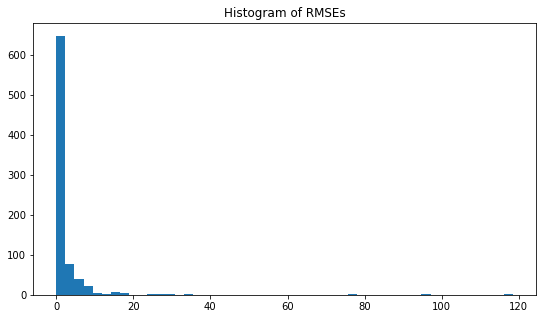

In [32]:
# Build histogram
plt.figure(figsize=(9,5))
plt.hist(rmse_dt, bins=50)
plt.title("Histogram of RMSEs")
plt.show()

Getting RMSEs that are very close to zero is a sign that our model is doing a decent job in making predictions. Some prediction errors are very high turning to overall RMSE distribution skewed to the right. Let's visualize actual vs prediction. 

In [33]:
# Get predictions (might take a while if Leave One Out)
pred = cross_val_predict(dt, X, y, cv=LeaveOneOut())

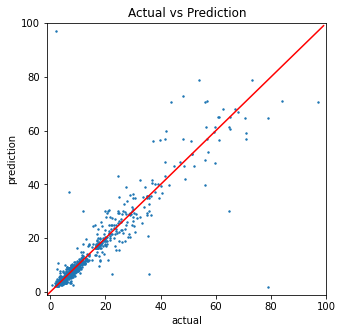

In [34]:
# Build simple scatterplot
plt.figure(figsize=(5,5))
plt.scatter(y,pred, marker="o", s=2)
plt.plot(np.arange(-1, 100, 1), np.arange(-1, 100, 1), color="red")
plt.xlim(-1,100)
plt.ylim(-1,100)
plt.ylabel("prediction")
plt.xlabel("actual")
plt.title("Actual vs Prediction")
plt.show()

The red line represents the hypothetical situation where prediction data and actual data are identical (zero errors). Our decision tree model produces fairly good predictions.

Now I would like to check the feature importance of our model.

In [35]:
def avg_feature_importance(Xcols, CV):
    '''
    This function produces a dataframe of average feature importances 
    calculated after a cross validation
    '''

    # build an empty dataframe
    featimp = pd.DataFrame(index=Xcols.columns)
    
    # loop through each fold, extract and store feature importances into a datafram
    for i in range(0, len(CV["estimator"])):
        importance = pd.DataFrame(data=CV["estimator"][i].feature_importances_, index=Xcols.columns, columns=["fold"+str(i+1)])
        featimp = pd.concat([featimp, importance], axis=1)
    
    # table of feature importances    
    featimp = featimp.T
    featimp_sorted = np.mean(featimp, axis=0).sort_values(ascending=True)
    return featimp_sorted

# The average of feature importances for decision tree
featimp_dt = avg_feature_importance(X, cv_dt)
featimp_dt

Loc_Jaipur         0.000022
Trans_Manual       0.000038
Trans_Automatic    0.000041
Loc_Pune           0.000087
Loc_Bangalore      0.000102
Loc_Ahmedabad      0.000146
Loc_Kolkata        0.000223
Loc_Chennai        0.000267
Loc_Delhi          0.000281
Loc_Coimbatore     0.000293
Loc_Mumbai         0.000298
Loc_Hyderabad      0.000329
Loc_Kochi          0.000381
Seats              0.000416
Owner_Type         0.000463
Fuel_Petrol        0.001881
Fuel_Diesel        0.001888
Engine             0.005495
Mileage            0.011554
DrivenKM           0.017036
Power              0.047318
Year               0.083373
New_Price          0.828067
dtype: float64

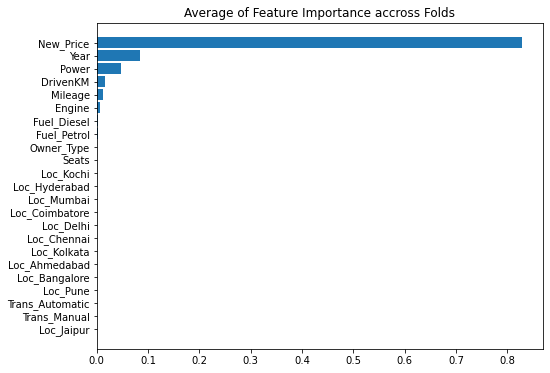

In [36]:
# The average of feature importances for decision tree visualized
plt.figure(figsize=(8,6))
plt.barh(width=featimp_dt, y=featimp_dt.index)
plt.title("Average of Feature Importance accross Folds")
plt.show()

It seems like **New_Price**, **Year**, **Kilometers Driven**, and **Mileage** are the most relevent features. Unlike linear regression coefficients, feature importance only shows which variables had the most impact in "purifying" tree nodes and it does not indicate whether a feature has a negative or positive impact.

#### 2.2 Random Forest
I will also train a Random Forest Regression to check if we can improve our results. 

Random Forest runs multiple decision trees against random samples of the training data (it samples observations and also features!). Several sets of predictions will be made (one for each decision tree) and they are all averaged out to produce a single representative set for the random forest regression. By doing this, random forest tend to be less prone to high variances (predictions are more stable).

A pit fall of the random forest is that since its a collection of multiple decision trees, it can take a lot of time to run depending on the size of the dataset. Below, I am also running a Leave One Out cross validation which will probably take q while to finish. Let's test random forest in our data. 

In [37]:
# Results RMSE and Actuals in Perspective
#def print_res(rmse_datalist, data_namelist, y, yname):
#    print("Results in Perspective")
#    print("---")
#    for rmse, name in zip(rmse_datalist, data_namelist):
#        print("Avg {A}: {B:.4g}".format(A=name, B=np.mean(rmse)))
#        print("Med {A}: {B:.4g}".format(A=name, B=np.median(rmse)))
#        print("Max {A}: {B:.4g}".format(A=name, B=np.max(rmse)))
#        print("Min {A}: {B:.4g}".format(A=name, B=np.min(rmse)))
#        print("---")
#    print("Avg {A}: {B:.4g}".format(A=yname, B=y.describe()["mean"]))
#    print("Med {A}: {B:.4g}".format(A=yname, B=y.describe()["50%"]))
#    print("Max {A}: {B:.4g}".format(A=yname, B=y.describe()["max"]))
#    print("Min {A}: {B:.4g}".format(A=yname, B=y.describe()["min"]))
#   return
   
# Train the model and generate RMSEs
import time
start = time.time()

rmse_rf, cv_rf, rf = runcv(RandomForestRegressor, mean_squared_error, LeaveOneOut)

# Take the mean of all RMSEs and compare with Decision Tree
print_res([rmse_dt, rmse_rf], ["Decision Tree", "Random Forest"], y, "Actual")

end = time.time()

RMSE Results and Actual Values
---
Avg Decision Tree: 2.3709090909090906
Med Decision Tree: 0.8899999999999997
Max Decision Tree: 118.4
Min Decision Tree: 0.0
---
Avg Random Forest: 1.7690012285012284
Med Random Forest: 0.6941499999999978
Max Random Forest: 97.39150000000002
Min Random Forest: 0.0057000000000004825
---
Avg Actual: 13.759054054054044
Med Actual: 8.25
Max Actual: 160.0
Min Actual: 0.7


In [38]:
print("Random Forest : {0:.4g} minutes".format((end-start)/60))

Random Forest : 3.645 minutes


Random Forest was better than the Decision Tree at predicting test data (RMSE of 0.12). However, it took about 3.5 minutes to finish running the model (on a fairly high spec computer). For certain applications of machine learning (behind an app), this could be too much.

Now let's visualize the distributions of RMSE. In orange, we have the RMSEs from the Decision Tree; in blue, we find the RMSEs from the Random Forest.

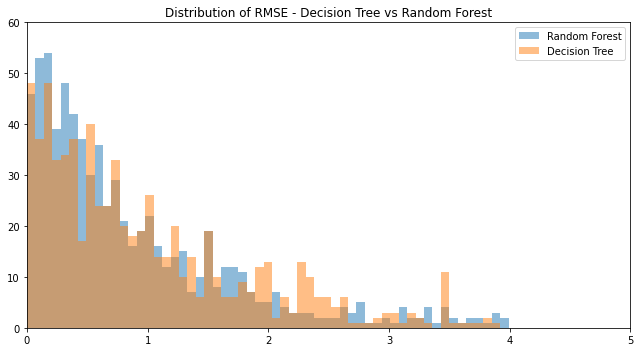

In [39]:
# Build histogram comparing DT and RF RMSE
# Let's check distributions of quantitative fields

binssetting = np.arange(0, 4, 0.07)

plt.figure(figsize=(9,5))
plt.hist(rmse_rf, bins=binssetting, alpha=0.5, label="Random Forest")
plt.hist(rmse_dt, bins=binssetting, alpha=0.5, label="Decision Tree")
plt.title("Distribution of RMSE - Decision Tree vs Random Forest")
plt.ylim(0,60)
plt.xlim(0,5)
plt.legend()

plt.tight_layout()
plt.show()

More values seems to be piling up at the lowest bin for Random Forest. This means that the predictions for Random Forest succeeded in having smaller errors. We will also check feature importance and make sure we don't get results that diverge from the Decision Tree.

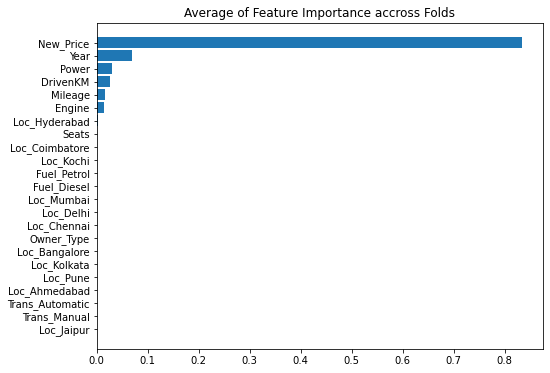

In [40]:
# The average of feature importances for random forest
featimp_rf = avg_feature_importance(X, cv_rf)
plt.figure(figsize=(8,6))
plt.barh(width=featimp_rf, y=featimp_rf.index)
plt.title("Average of Feature Importance accross Folds")
plt.show()

#### 2.3 Linear Regression
Finally, let's try a linear regression model.

In [41]:
# Import time library to record time
import time
start = time.time()

# Linear Regression
lr = LinearRegression()

# Set Scorer
mse = make_scorer(mean_squared_error)

# Cross Validation 
loo = LeaveOneOut()

# Train the model (might take a while if Leave One Out)
cv_lr = cross_validate(lr, X, y, scoring=mse, cv=loo, return_estimator=True)

# Square scores so that we have RMSE
rmse_lr = np.sqrt(cv_lr["test_score"])

# Take the mean of all RMSEs
print_res([rmse_dt, rmse_rf, rmse_lr], ["Decision Tree", "Random Forest", "Linear Regression"], y, "Actual")

end = time.time()

RMSE Results and Actual Values
---
Avg Decision Tree: 2.3709090909090906
Med Decision Tree: 0.8899999999999997
Max Decision Tree: 118.4
Min Decision Tree: 0.0
---
Avg Random Forest: 1.7690012285012284
Med Random Forest: 0.6941499999999978
Max Random Forest: 97.39150000000002
Min Random Forest: 0.0057000000000004825
---
Avg Linear Regression: 3.3110580652130244
Med Linear Regression: 1.909365504403194
Max Linear Regression: 70.79738189280668
Min Linear Regression: 0.004128642233808932
---
Avg Actual: 13.759054054054044
Med Actual: 8.25
Max Actual: 160.0
Min Actual: 0.7


Using sklearn library's "LinearRegression", we get a RMSE of 3.311 which is worse than the Decision Tree and the Random Forest.

However, as I explain below, we should probably perform some data transformation before we start working with linear regressions. We will look into that later. For now, let's check the model coefficients in a similar way we did with feature importances for Decision Tree and Random Forest.

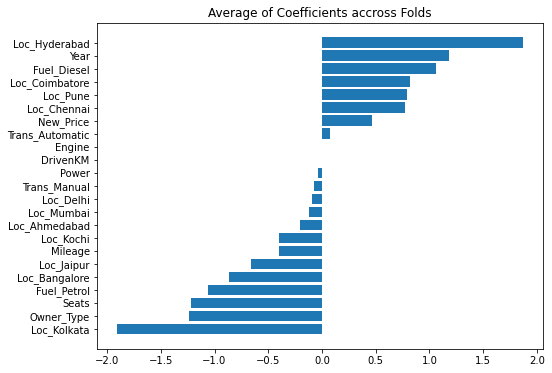

Loc_Kolkata       -1.907744
Owner_Type        -1.242027
Seats             -1.216212
Fuel_Petrol       -1.063892
Loc_Bangalore     -0.866583
Loc_Jaipur        -0.664918
Mileage           -0.400348
Loc_Kochi         -0.398280
Loc_Ahmedabad     -0.202799
Loc_Mumbai        -0.121772
Loc_Delhi         -0.089352
Trans_Manual      -0.076806
Power             -0.036393
DrivenKM          -0.000038
Engine             0.003722
Trans_Automatic    0.076806
New_Price          0.464297
Loc_Chennai        0.768330
Loc_Pune           0.790827
Loc_Coimbatore     0.822764
Fuel_Diesel        1.063892
Year               1.178828
Loc_Hyderabad      1.869525
dtype: float64


In [42]:
def avg_coef(Xcols, CV):
    '''
    This function produces a dataframe of average feature importances 
    calculated after a cross validation
    '''
    # build an empty dataframe
    featimp = pd.DataFrame(index=Xcols.columns)
    
    # loop through each fold, extract and store feature importances into a datafram
    for i in range(0, len(CV["estimator"])):
        importance = pd.DataFrame(data=CV["estimator"][i].coef_, index=Xcols.columns, columns=["fold"+str(i+1)])
        featimp = pd.concat([featimp, importance], axis=1)
    
    # table of feature importances    
    featimp = featimp.T
    featimp_sorted = np.mean(featimp, axis=0).sort_values(ascending=True)
    return featimp_sorted

# The average of coefficients for linear regresson
featimp_lr = avg_coef(X, cv_lr)
plt.figure(figsize=(8,6))
plt.barh(width=featimp_lr, y=featimp_lr.index)
plt.title("Average of Coefficients accross Folds")
plt.show()

print(featimp_lr)

The coefficients show a story that is totally different from the feature importances. We see, for example, that Loc_Hydebarad has largest positive correlation toward used car price, which makes absolute no sense. Other features also show relationships that are hard to interpret.

#### Linear Regression Assumptions
For a linear regression to render good coefficients, it is important that the training data meets certain assumptions.

For example, the data cannot have features that are strongly correlated with each other (multicollinearity problem), special treatments need to be done to categorical variables (dummy variable trap), and the coefficients would (probably) look better if the data was transformed into normal distribution (linearity assumptions).

Treatments listed above are important if the analyst wants to do inference work. In other words, if the analyst is interested in the coefficients and wants to draw conclusions about which features are associated with higher or lower used car prices. If the analyst only cares about prediction, then none of that really matters too much.

For inferential analysis, I would rather use the statsmodels library which offers an easier way to get summary of results, perform statistical tests, etc. We use the statsmodels library in the part 2 of this project.

### 3. Apply Trained Models on Another Used Car Data
As for the final step of Part 1 of this project, I will use the models above to predict values for our dataset of unknown used car prices. As mentioned in the beginning of this project, this is a separete dataset that was initially named as "test data" when I downloaded it from Kaggle.

All data transformations have been already done in section 1 of this project

In [43]:
# This is our dataframe of unknown used car prices (SecHand_Price is all NaN)
# There are 181 datapoints
df_unk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 2 to 1217
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             181 non-null    object 
 1   Year             181 non-null    int64  
 2   DrivenKM         181 non-null    int64  
 3   Owner_Type       181 non-null    int64  
 4   Mileage          181 non-null    float64
 5   Engine           181 non-null    float64
 6   Power            181 non-null    float64
 7   Seats            181 non-null    float64
 8   New_Price        181 non-null    float64
 9   SecHand_Price    0 non-null      float64
 10  Dataset          181 non-null    object 
 11  Trans_Automatic  181 non-null    uint8  
 12  Trans_Manual     181 non-null    uint8  
 13  Fuel_Diesel      181 non-null    uint8  
 14  Fuel_Petrol      181 non-null    uint8  
 15  Loc_Ahmedabad    181 non-null    uint8  
 16  Loc_Bangalore    181 non-null    uint8  
 17  Loc_Chennai    

In [44]:
# function that refit all models and generate predictions using new data
def getpred(models, trainX, trainy, unknown_data):
    p = []
    for m in models:
        p.append(m.fit(trainX, trainy).predict(unknown_data[trainX.columns]))
    return p

# apply function
predictions = getpred([dt, rf, lr], X, y, df_unk)

# store predictions into a dataframe and check
df_predictions = pd.DataFrame(predictions, index=["Decision Tree", "Random Forest", "Linear Reg"]).T
df_predictions

,Decision Tree,Random Forest,Linear Reg
0,18.00,19.1270,19.139968
1,3.10,4.2535,4.013088
2,9.50,10.0883,13.782518
3,17.50,19.3024,28.995567
4,10.07,9.3580,12.980669
...,...,...,...
176,5.50,5.0341,4.979712
177,6.80,6.8348,7.621895
178,19.92,14.5192,13.210092
179,9.90,9.1669,8.600269


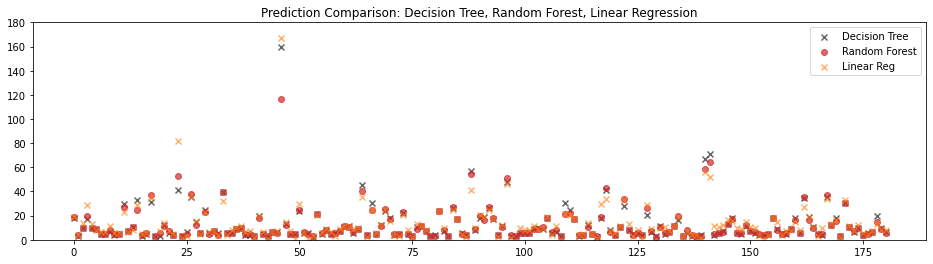

In [45]:
# show plot of predictions
plt.figure(figsize=(16,4))
plt.title("Prediction Comparison: Decision Tree, Random Forest, Linear Regression")
plt.scatter(df_predictions.index, "Decision Tree", data=df_predictions, color="black", marker="x", alpha=0.6) 
plt.scatter(df_predictions.index, "Random Forest", data=df_predictions, color="tab:red", alpha=0.7) 
plt.scatter(df_predictions.index, "Linear Reg", data=df_predictions, color="tab:orange", marker="x", alpha=0.6) 
plt.legend()
plt.ylim(0,180)
plt.show()


For a couple of data points, we see large variance between Decision Tree, Random Forest, and Linear Regression predictions. Overall, however, model predictions are are not very far from each other, which is a sign that we are in the right direction. Now, I would like just to check if the prediction magnitudes make sense by looking at the historical data that I used for model training.

In [46]:
# Extract a sample of y
ysample = y.sample(181, random_state=1)

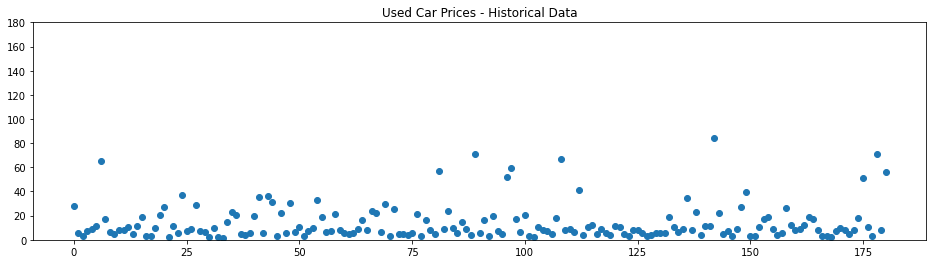

In [47]:
# Plot y
plt.figure(figsize=(16,4))
plt.title("Used Car Prices - Historical Data")
plt.scatter(y.sample(181, random_state=1).reset_index().index, "SecHand_Price", data=y.sample(181, random_state=1).reset_index())
plt.ylim(0,180)
plt.show()

We see that the plot of historical used car prices shows a pattern that is similar to our predictions. Most values are between 0 and 20, other values lie between 30 and 40, and the remaining are over 40. We should probably be worried about the predictions that go up to 80 - 120. I would suggest that the analyst check the dataset of unknown used prices - it could have data errors or extreme outliers. 

For the purposes of this project, I am happy with these results and I will end the prediction work here. In part 2, I will use the statsmodels library to run a linear regression for inferential analysis.

In [48]:
# Reedit the data to build a final output chart

# organize columns in historical data
y_historical = pd.DataFrame(y).rename(columns={"SecHand_Price":"Decision Tree"}).reset_index(drop=True)
y_historical["Random Forest"] = y_historical["Decision Tree"]
y_historical["Linear Reg"] = y_historical["Decision Tree"]
y_historical["Category"] = "Historical"

# rename column and concat with predictions
df_predictions["Category"] = "Prediction"
df_results = pd.concat([y_historical, df_predictions]).reset_index(drop=True)

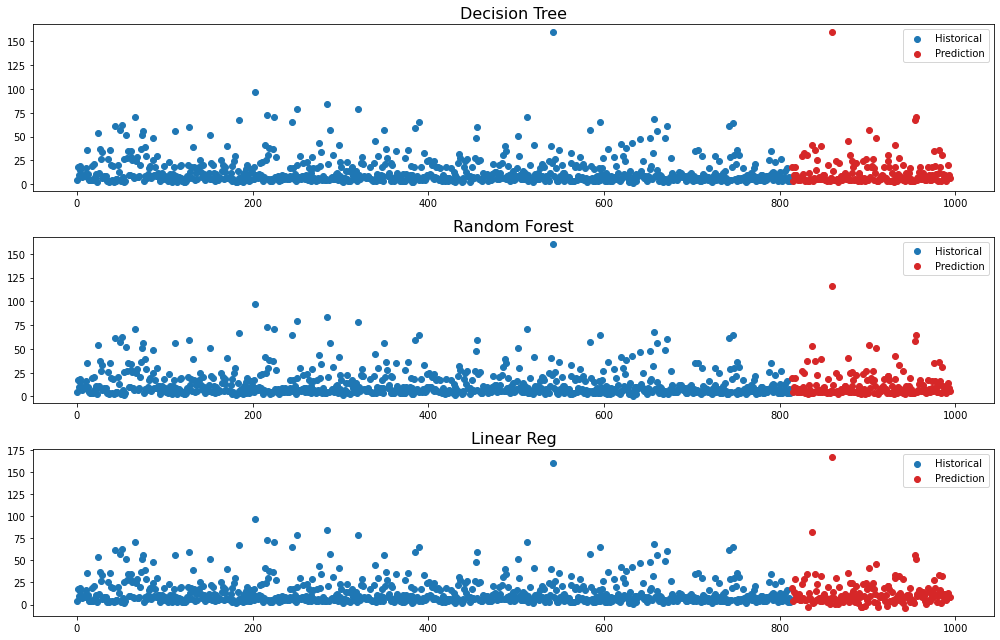

In [49]:
# plot actuals + predictions in a single chart

fig, axs = plt.subplots(3,1, figsize=(14,9))
for ax, model in zip(axs.ravel(), df_results.columns):
    for cat, color in zip(df_results["Category"].unique(), ["tab:blue", "tab:red"]):
        mask = df_results["Category"] == cat
        ax.scatter(df_results[mask].index, model, data=df_results[mask], c=color, label=cat)
        ax.set_title(model, fontsize=(16))
        ax.legend()
        plt.tight_layout()

plt.show()

This is the end of the part 1 of this project.